# KNN para clasificación y regresión 

**Este notebook solo tiene algunas modificaciones del de [aquí](https://drive.google.com/drive/folders/10jx0A4NBQl7i_BU00QUZlgILYg38HbJX)**

In [1]:
# LIBRARIES
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold

# KNN para clasificación de datos iris

Una descripción de los datos `Iris` puede ser consultada en [UCI](https://archive.ics.uci.edu/ml/datasets/Iris)

## Carga de datos Iris

Estos datos son de la medidas de longitud y anchura de los petalos y sepalos de 4 distintas flores. 

- Se tienen 4 mediciones: 
        1) sepal length in cm
        2) sepal width in cm
        3) petal length in cm
        4) petal width in cm
        
 - Se tienen 3 posibles categorías:
      - Iris Setosa
      - Iris Versicolour
      - Iris Virginica

In [2]:
iris_data=load_iris()

In [3]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Uso de Cross-validation para mejorar las predicciones

In [5]:
X=iris_data.data
y=iris_data.target
knn = KNeighborsClassifier(n_neighbors=10)
y_pred = cross_val_predict(knn, X, y, cv=5)

In [6]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Evaluación

In [7]:
print(mean_squared_error(y,y_pred))
print(r2_score(y,y_pred))

0.02
0.97


## ¿Cómo elegir K?

In [8]:
error = []
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=5)
    error.append(mean_squared_error(y,y_pred)) 

In [9]:
import matplotlib.pyplot as plt

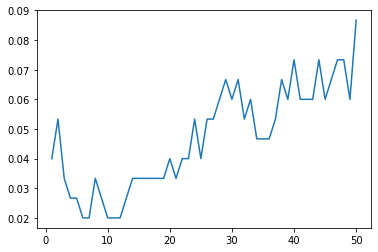

In [10]:
plt.plot(range(1,51),error)

# KNN para regresión de datos House prices of Boston

Las propiedades de estos datos pueden ser consultadas en [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices).

In [11]:
boston_data=load_boston()

In [12]:
boston_data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [13]:
boston_data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [14]:
X=boston_data.data
y=boston_data.target
knn = KNeighborsRegressor(n_neighbors=10)
y_pred = cross_val_predict(knn, X, y, cv=5)

In [15]:
y_pred

array([24.  , 26.17, 21.95, 23.09, 21.99, 21.95, 23.72, 22.32, 23.54,
       27.12, 24.93, 22.62, 23.56, 22.63, 31.44, 23.75, 27.76, 27.38,
       25.43, 24.88, 27.33, 22.32, 22.32, 24.54, 22.32, 29.31, 31.44,
       29.31, 26.45, 31.44, 31.52, 28.19, 20.09, 34.18, 20.09, 21.17,
       23.19, 23.67, 24.47, 35.55, 33.77, 23.99, 23.99, 23.99, 21.66,
       21.65, 21.65, 30.28, 25.19, 21.95, 30.77, 31.98, 30.06, 30.06,
       31.11, 39.74, 25.23, 37.2 , 25.35, 25.61, 28.85, 36.17, 29.06,
       25.96, 28.66, 26.8 , 26.38, 27.11, 26.43, 26.43, 28.47, 28.32,
       30.27, 28.09, 25.67, 20.11, 28.54, 20.11, 20.11, 20.36, 26.85,
       32.41, 26.89, 26.01, 22.82, 25.55, 22.88, 22.79, 21.5 , 21.88,
       21.35, 21.68, 31.67, 31.17, 37.68, 25.85, 21.91, 21.81, 24.1 ,
       22.14, 19.22, 19.68, 13.62, 21.05, 21.05, 21.05, 21.05, 21.05,
       21.05, 21.05, 21.29, 20.52, 20.52, 20.52, 20.52, 19.2 , 19.34,
       20.52, 19.74, 19.6 , 28.03, 28.82, 23.98, 23.98, 25.38, 25.66,
       26.64, 20.52,

In [16]:
from math import sqrt

In [17]:
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y,y_pred))

8.605464138759643
0.12278604134701132


In [18]:
error = []
for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=5)
    error.append(mean_squared_error(y,y_pred)) 

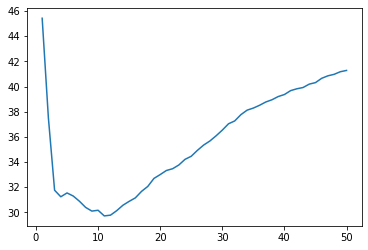

In [33]:
plt.plot(range(1,51),error)

## Escalamiento

Para mejorar las estimaciones podemos utilizar el escalamiento utlizando `StadarScaler()`. Para evitar errores de data leakage usaremos `make_pipeline`.

In [20]:
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))

In [21]:
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=5)
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y,y_pred))

5.492547106344652
0.6426411712043607


In [22]:
error = []
for k in range(1,51):
    classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=5)
    error.append(mean_squared_error(y,y_pred))

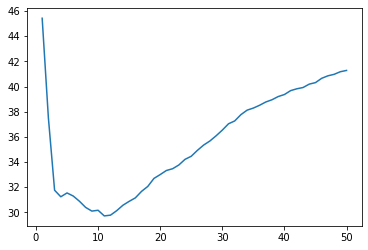

In [23]:
plt.plot(range(1,51),error)

<h3>Comparing Models</h3>
<p>It's important when you compare models that you are comparing on the same data.
    <p>When the data is split into training and testing using cross-validation, you need to split the same way every time if you want to really compare trials</p>

Veamos como funciona `KFold` con un pequeño ejemplo

In [24]:
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [25]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [26]:
cv = KFold(n_splits=5, random_state=0, shuffle=False)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [27]:
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y,y_pred))

5.492547106344652
0.6426411712043607


<h3>Which is better? kNN or a simple linear regression model?</h3>
<p>Looking at the difference in RMSE and R2 we might assume that the knn performs significantly better than the Linear Model, however a two-sample t-test shows that they are not significantly different.

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
classifier_pipeline = make_pipeline(StandardScaler(), LinearRegression())
y_pred2 = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print(sqrt(mean_squared_error(y,y_pred2)))
print(r2_score(y,y_pred2))

6.089585334727413
0.5607291575860904


In [30]:
diff_knn = [abs(round(y[i]-y_pred[i],2)) for i in range(0,len(y))]
diff_linear = [abs(round(y[i]-y_pred2[i],2)) for i in range(0,len(y))]

In [31]:
from scipy.stats import ttest_ind
ttest_ind(diff_knn,diff_linear)

Ttest_indResult(statistic=-1.5702050918828787, pvalue=0.11668061382855544)

<h3>Feature Selection</h3>
<p>Sometimes not all input variables are good predictor of the output variables. Sometimes, some of them can actually decrease the accuracy of the model.</p>
<p>Feature Selection allows you to try out the model with different subsets of input variables to determine which are the best predictors</p>

<h3>Evaluation</h3>
<p>Looking at the mean squared error, and r2 score alone, often we can think we have a great model when in actual fact there are some underlying problems.
<p>That is why it is always imporant to look at the <b>residuals</b>
    <p><b>Coming soon: </b>Feature selection and Evaluation for kNN Regression (and most learning algorithms tbh)